In [40]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=.3, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='liblinear')
rnd_clf = RandomForestClassifier(n_estimators=3)
svm_clf = SVC(gamma='auto',probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='soft')
# voting_clf.fit(X,y)

In [66]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X,y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, accuracy_score(y,y_pred))

LogisticRegression 0.842
RandomForestClassifier 0.972
SVC 0.908
VotingClassifier 0.93


In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",max_leaf_nodes=32), 
    n_estimators=500, 
    max_samples=1.0, 
    bootstrap=True, 
    n_jobs=-1,
    verbose=1)
bag_clf.fit(X,y)
y_pred = bag_clf.predict(X)
accuracy_score(y,y_pred)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    1.7s remaining:    8.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


0.948

In [68]:
bag_clf.oob_score_

0.916

In [73]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32,n_jobs=-1)
rnd_clf.fit(X,y)
y_pred = rnd_clf.predict(X)
accuracy_score(y,y_pred)

0.972

In [74]:
from sklearn.tree import ExtraTreeClassifier
et_clf = ExtraTreeClassifier()
et_clf.fit(X,y)
y_pred = et_clf.predict(X)
accuracy_score(y,y_pred)

1.0

In [75]:
rnd_clf.feature_importances_

array([0.43834253, 0.56165747])

In [76]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"],iris["target"])
for name, score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.09774095972821512
sepal width (cm) 0.02327246246493951
petal length (cm) 0.46135937850605335
petal width (cm) 0.417627199300792


In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm="SAMME.R",
                             learning_rate=.5)
ada_clf.fit(X,y)
y_pred = ada_clf.predict(X)
accuracy_score(y,y_pred)

0.962

In [136]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

X = np.linspace(-5,5,200)[:,np.newaxis]
y = 2*X*X + 5*X +3 +np.random.randn(200,1)*3
X.shape,y.shape

((200, 1), (200, 1))

In [101]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)
y_pred = tree_reg1.predict(X)

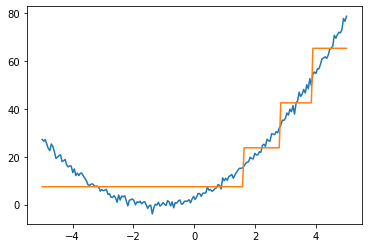

In [102]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.plot(X,y_pred)

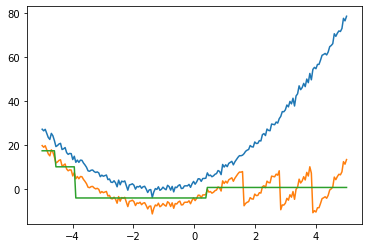

In [112]:
y2 = y - y_pred[:,np.newaxis]
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)
y2_pred = tree_reg2.predict(X)

plt.plot(X,y)
plt.plot(X,y2)
plt.plot(X,y2_pred)
plt.show()

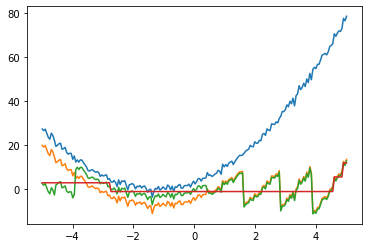

(200, 1)

In [119]:
y3 = y2 - y2_pred[:,np.newaxis]
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)
y3_pred = tree_reg3.predict(X)

plt.plot(X,y)
plt.plot(X,y2)
plt.plot(X,y3)
plt.plot(X,y3_pred)
plt.show()

y3.shape

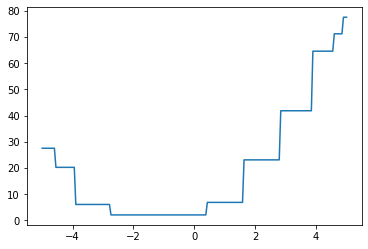

In [123]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))
plt.plot(X,y_pred)

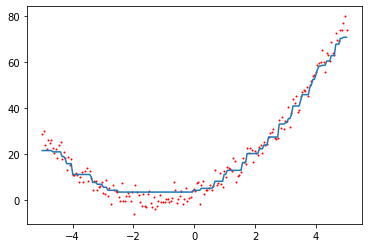

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=30, learning_rate=.1)
gbrt.fit(X,y)
y_pred = gbrt.predict(X)
plt.scatter(X,y,c='r',s=1)
plt.plot(X,y_pred)
plt.show()

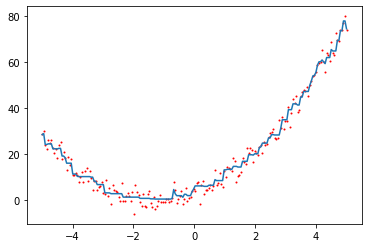

In [148]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train,y_train)
y_pred = gbrt_best.predict(X)

plt.scatter(X,y,c='r',s=1)
plt.plot(X,y_pred)
plt.show()

80


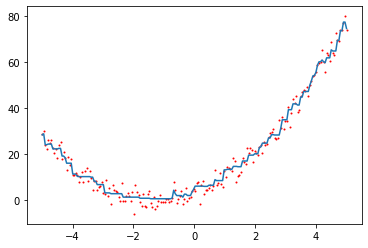

In [151]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val,y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            print(n_estimators)
            break
            
y_pred = gbrt.predict(X)

plt.scatter(X,y,c='r',s=1)
plt.plot(X,y_pred)
plt.show()